# Exploration des données – BBC News Dataset

## Objectif
Comprendre la structure du dataset avant toute étape de preprocessing ou de clustering.
Cette étape permet d’analyser :
- les colonnes disponibles
- le nombre de documents
- les thèmes (catégories)
- la longueur des textes


# Cellule 2 — Import des bibliothèques

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cellule 3 — Chargement du dataset

In [16]:
# Chargement des données
df = pd.read_csv("data/bbc-text.csv")

# Aperçu des premières lignes
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Cellule 4 — Structure générale du dataset

In [17]:
# Dimensions du dataset
df.shape

(2225, 2)

In [18]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


# Cellule 5 — Vérification des valeurs manquantes

In [19]:
# Valeurs manquantes par colonne
df.isna().sum()

category    0
text        0
dtype: int64

# Cellule 6 — Analyse des catégories (thèmes)

In [20]:
# Nombre de catégories uniques
df["category"].nunique()

5

In [21]:
# Répartition des documents par catégorie
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

# Cellule 7 — Visualisation : documents par thème 

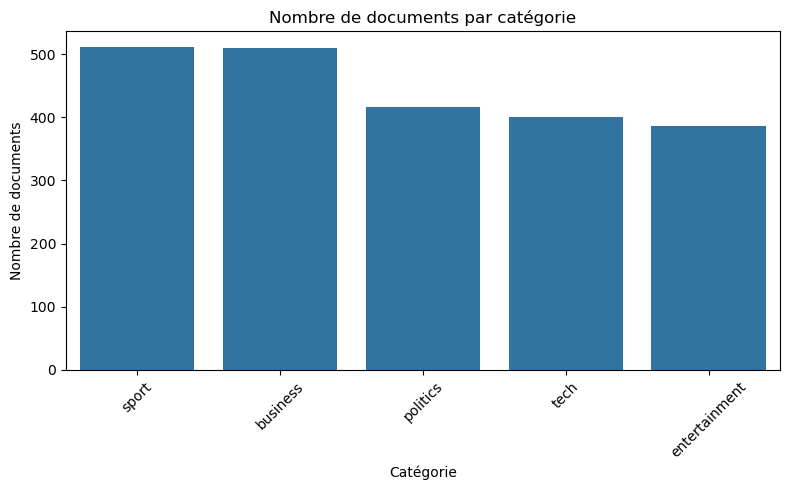

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.title("Nombre de documents par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de documents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cellule 8 — Analyse de la longueur des textes

In [23]:
# Longueur des textes (nombre de mots)
df["text_length"] = df["text"].apply(lambda x: len(x.split()))

df["text_length"].describe()

count    2225.000000
mean      390.295281
std       241.753128
min        90.000000
25%       250.000000
50%       337.000000
75%       479.000000
max      4492.000000
Name: text_length, dtype: float64

# Cellule 9 — Distribution des longueurs de texte

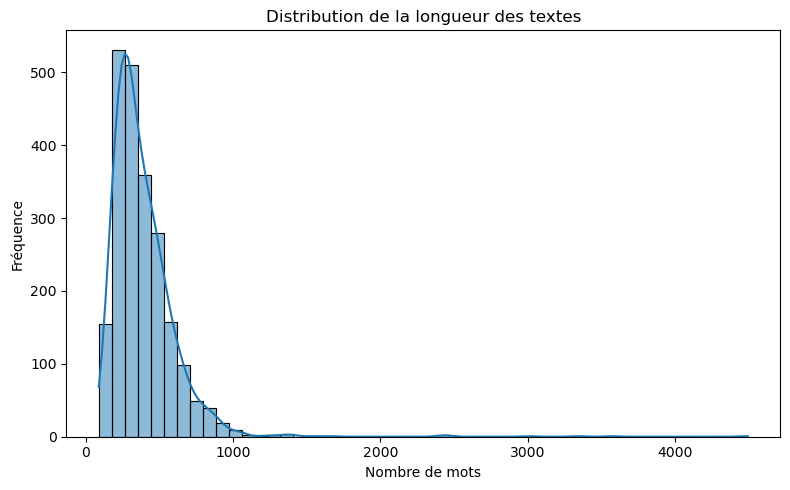

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution de la longueur des textes")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

# Cellule 10 — Exemple de texte brut

In [25]:
# Exemple de document brut
df["text"].iloc[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

## Conclusion de l’exploration

- Le dataset contient des articles de presse classés par thème.
- Les textes sont de longueur variable.
- La colonne `category` servira uniquement à l’interprétation des clusters.
- Une étape de preprocessing NLP est nécessaire avant la vectorisation TF-IDF.
